In [1]:
import matplotlib.pyplot as plt
from scipy import signal
import sympy as sp
import numpy as np
import math

In [2]:
# a.1
fs1 = 3.2*10**3
fs2 = 5*10**3
B = 10**3
Omega1 = 2*sp.pi*fs1
Omega2 = 2*sp.pi*fs2

ws1, ws2, omega0 = sp.symbols("ws1 ws2 omega0")

exp1 = (omega0**2-fs1**2)/(fs1*B)
exp2 = (omega0**2-fs2**2)/(fs2*B)
display(sp.solve(sp.Eq(exp1,exp2), omega0))

# c)
display(abs((4**2-3.2**2)/(3.2)))

cn = sp.cosh(5*sp.acosh(1.8))
e = sp.sqrt((10**(-40/-10)-1)/cn**2)
rippledB = 10*sp.log(1+e**2, 10)
display(e, rippledB.evalf())


[-4000.0*I, 4000.0*I]

1.7999999999999994

0.513609060039144

1.01676380772010

In [3]:
# a.2
fs = 10*10**3
asb = 30
n = 4

e = 1/sp.sqrt(10**(asb/10)-1)
display(e)

cn = lambda w: sp.cosh(n*sp.acosh(w))
w = 5/10
exp = e**2*cn(1/w)**2
hinv = (exp/(1+exp))
hinvdb = 10*sp.log(hinv, 10)
display(hinvdb.evalf())
#display(cn(w), (exp/(1+exp)), 1-1/(1+exp))

# c)
ws = 10/5
n = (1/(sp.acosh(ws)))*sp.acosh(sp.sqrt((10**(asb/10)-1)/(10**(0.428/10)-1)))
display(n)


0.0316385998584166

-0.438238150210401

4.00943040477020

In [4]:
# a.3)
Omega0 = 100

# a)
s = sp.symbols("s")
exp = (s**2+1.2*s+1)
lpPoles = sp.solve(sp.Eq(exp, 0), s)

# b)
hpPoles = [(Omega0/lpPoles[i]).evalf() for i in range(len(lpPoles))]
display(hpPoles)
 
# c)
S, omega, k = sp.symbols("S \Omega k")
exp =  (k*S**2)/((S+60+80j)*(S+60-80j))
expSub = exp.subs({S: 1j*omega})
test = sp.limit(expSub, omega, math.inf)
display(test)

[-60.0 + 80.0*I, -60.0 - 80.0*I]

1.0*k

In [5]:
# b.1)
z = sp.symbols("z")
expZeros = 1*z**3+2*z**2+1
expPoles = 1*z**3-0.5*z**2+0.25*z**1
#expZeros = 1+2*z**(-1)+z**(-3)
# expPoles = 1-0.5*z**(-1)+0.25*z**(-2)

poles = sp.solve(sp.Eq(expPoles, 0), z)
poles = [poles[i].evalf() for i in range(len(poles))]
zeros = sp.solve(sp.Eq(expZeros, 0), z)
zeros = [zeros[i].evalf() for i in range(len(zeros))]
display(poles)
display(zeros)

# e)
G = sp.symbols("G")
hz = expZeros/expPoles
hz = hz.subs({z: sp.exp(1j*0)})
G = sp.solve(sp.Eq(10, 20*sp.log(G*hz, 10)), G)
display(G)


(20*sp.log(0.5929*hz, 10)).evalf()

[0, 0.25 - 0.433012701892219*I, 0.25 + 0.433012701892219*I]

[0.102784715200295 + 0.665456951152813*I,
 0.102784715200295 - 0.665456951152813*I,
 -2.20556943040059]

[0.592927061281571]

9.99960356562452

In [56]:
# b.2)
fs = 2*10**3
fc = 400
M = 4
wc = 2*sp.pi*(fc/fs)

## a)
n = sp.symbols("n")
firstExp = (sp.sin(sp.pi*(n-(M/2))))/(sp.pi*(n-(M/2)))
lastExp = (sp.sin(wc*(n-(M/2))))/(sp.pi*(n-(M/2)))
exp = firstExp - lastExp

h_d = np.array([sp.limit(exp, n, nVal).evalf() for nVal in range(M+1)])

# find the gain
z, G = sp.symbols("z G")
G = 1/h_d.sum()
# hdExpDb = 20*sp.log(G*hdExp.subs({z: sp.exp(1j*0)}).evalf(), 10)

# calculate new h_d
newh_d = h_d*G
display(G, h_d, newh_d)
display((20*sp.log(newh_d.sum(), 10)).evalf())

# b) recalculate using haming
display("b")
w = lambda n, M: 0.54 - 0.46*sp.cos(2*sp.pi*n/M)
w_n = np.array([w(n, M) for n in range(len(h_d))])
h_d_h = h_d * w_n
G = 1/h_d_h.sum()
new_h_d_h = G*h_d_h
display(w_n, h_d_h, G, new_h_d_h, (20*sp.log(new_h_d_h.sum(), 10)).evalf())

## d)
display("d.")
z, w = sp.symbols("z w")
Hz = np.array([val*z**(-1*i) for i, val in enumerate(h_d)]).sum()
HzExp = Hz.subs({z: sp.exp(-1j*w)})
HzExpDiff = sp.diff(HzExp, w)

#x = np.arange(0, 6*sp.pi, 0.1)
#y = np.empty(len(x), dtype=complex)
#for i, xVal in enumerate(x):
#    y[i] = sp.arg(HzExpDiff.subs({w: xVal}))
#
#display(Hz, HzExp, sp.diff(HzExp, w))
#
#fig, ax = plt.subplots()
#ax.plot(x, y.real)






-5.19320704481614

array([-0.0935489283788639, -0.302730691456263, 0.600000000000000,
       -0.302730691456263, -0.0935489283788639], dtype=object)

array([0.485818953892116, 1.57214315955273, -3.11592422688968,
       1.57214315955273, 0.485818953892116], dtype=object)

-1.92865493310657e-15

'b'

array([0.0800000000000000, 0.540000000000000, 1.00000000000000,
       0.540000000000000, 0.0800000000000000], dtype=object)

array([-0.00748391427030911, -0.163474573386382, 0.600000000000000,
       -0.163474573386382, -0.00748391427030911], dtype=object)

3.87472210237101

array([-0.0289980880354165, -0.633418542675885, 2.32483326142260,
       -0.633418542675885, -0.0289980880354165], dtype=object)

0

'd.'

-0.0935489283788639 - 0.302730691456263/z + 0.6/z**2 - 0.302730691456263/z**3 - 0.0935489283788639/z**4

-0.302730691456263*exp(1.0*I*w) + 0.6*exp(2.0*I*w) - 0.302730691456263*exp(3.0*I*w) - 0.0935489283788639*exp(4.0*I*w) - 0.0935489283788639

-0.302730691456263*I*exp(1.0*I*w) + 1.2*I*exp(2.0*I*w) - 0.908192074368789*I*exp(3.0*I*w) - 0.374195713515456*I*exp(4.0*I*w)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [32]:
# b.3)
display("EQ1")
tf = signal.TransferFunction([1,1,1,1], [1])
display(tf.zeros, tf.poles)

display("EQ2")
tf = signal.TransferFunction([1,2,1], [1,-1.8,0.81])
display(tf.zeros, tf.poles)

display("EQ3")
tf = signal.TransferFunction([1,-2,1], [1,1.8,0.81])
display(tf.zeros, tf.poles)

display("EQ4")
tf = signal.TransferFunction([1,1.2,0.72], [1,-1.2,0.72])
display(tf.zeros, tf.poles)

display("EQ5")
tf = signal.TransferFunction([1,1.2826], [1])
display(tf.zeros, tf.poles)

# TEST
display("EQ5")
tf = signal.TransferFunction([1, 2, 1], [1, 0, -0.1716])
display(tf.zeros, tf.poles)

'EQ1'

array([-1.00000000e+00+0.j, -7.77156117e-16+1.j, -7.77156117e-16-1.j])

array([], dtype=float64)

'EQ2'

array([-1., -1.])

array([0.90000001, 0.89999999])

'EQ3'

array([1., 1.])

array([-0.89999999, -0.90000001])

'EQ4'

array([-0.6+0.6j, -0.6-0.6j])

array([0.6+0.6j, 0.6-0.6j])

'EQ5'

array([-1.2826])

array([], dtype=float64)

'EQ5'

array([-1., -1.])

array([-0.4142463,  0.4142463])

In [7]:
# c.1
N = 4
k, W = sp.symbols("k W")

x_n = [1, 4, -2, 2]
exp = 0
for nVal in range(0, len(x_n)):
    exp += x_n[nVal]*W**(k*nVal)
exp = exp.subs({W: sp.exp(-1j*((2*sp.pi)/N))})
X_k = [exp.subs({k: kVal}).evalf() for kVal in range(N)]
display(X_k)

h_n = [-1, 1, 0, 0]
exp = 0
for nVal in range(0, len(h_n)):
    exp += h_n[nVal]*W**(k*nVal)
exp = exp.subs({W: sp.exp(-1j*((2*sp.pi)/N))})
H_k = [exp.subs({k: kVal}).evalf() for kVal in range(N)]
display(H_k)

[5.00000000000000, 3.0 - 2.0*I, -7.0 + 3.66685418335948e-25*I, 3.0 + 2.0*I]

[0, -1.0 - 1.0*I, -2.0 + 0.e-23*I, -1.0 + 1.0*I]

In [8]:
# c.2)
from scipy.fft import fft, ifft
y_n = np.convolve(x_n, h_n)
x_n = np.array(x_n)
h_n = np.array(h_n)
H_k = np.array(H_k)
X_k = np.array(X_k)

H_k = np.fft.fft([-1,1,0,0], n=4)
Y_k = X_k*H_k
Y_k = np.array([Y_k[i].evalf() for i in range(len(Y_k))])
y_n = np.fft.ifft(Y_k)
display(Y_k, y_n)

#np.fft.ifft(np.convolve(x_n,h_n))
#np.convolve(x_n,h_n)[:4]
y_n2 = np.convolve(x_n,h_n)[:4]
display(y_n, y_n2)
np.fft.fft(y_n)

# fft -> we get X[k]
# ifft -> we get x[n]

array([0, -5.0 - 1.0*I, 14.0 - 7.33370836671897e-25*I, -5.0 + 1.0*I],
      dtype=object)

array([ 1.-1.83342709e-25j, -3.+1.83342709e-25j,  6.-1.83342709e-25j,
       -4.+1.83342709e-25j])

array([ 1.-1.83342709e-25j, -3.+1.83342709e-25j,  6.-1.83342709e-25j,
       -4.+1.83342709e-25j])

array([-1, -3,  6, -4])

array([ 0.+0.00000000e+00j, -5.-1.00000000e+00j, 14.-7.33370837e-25j,
       -5.+1.00000000e+00j])

In [11]:
exp = -1 + 1* sp.exp(-1j*2*sp.pi*10**3/(16*10**3))
(20*sp.log(abs(exp.evalf()), 10)).evalf()

-8.17468557522598

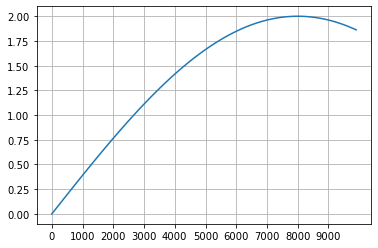

In [23]:
x = np.arange(0, 10*10**3, 100)
y = np.empty(len(x))

for i, xVal in enumerate(x):
    exp = -1 + 1* sp.exp(-1j*2*sp.pi*xVal/(16*10**3))
    y[i] = abs(exp.evalf())

fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xticks(np.arange(0, 10*10**3, 1000))
ax.grid()